    Department Of Computer Science
    COMP4381, SP.TOP: DATA SCIENCE AND ANALYTICS
    Dr. Hussein Soboh
    COMP4381 | Section 1 

## <div align=center> Assignment #7 </div>
<div align=center><b> 3D prints roughness dataset</b></div>
<div align=center>Linear Regression pipeline for the Roughness of the 3D prints</div>

    Prepeared by: Sondos Aabed
    ID: 1190652

## Table of Contents

- Introduction
- Tools and Versions
- Data Analysis Process
    - Data Wrangling
    - Data preparation for modeling
        - Feature scaling.
        - Feature selection.
        - Data splitting.
- Data Modeling Processing
    - Algorithm
    - Training 
    - Testing
    - Evaluation
- Insights and Conclusions
    
<hr>

## Introduction

### About the dataset


<hr>

## Tools and Versions

The following tools and versions are utiliize through this reporting:

|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|Git & github|[Repo.](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A7-3D-prints-Roughness/1190652_A7.ipynb)|

<hr>

## Data Analysis Process

### Data Wrangling

In this section, the data wrangling process is followed wehre first the dataset is loaded and it goes through assessment and cleansing. Inluding aspectes of structural probelms and outliers, duplicaes or missing values.

#### Loading the Dataset

[Kaggle Link of the Dataset](https://www.kaggle.com/datasets/afumetto/3dprinter/data?select=data.csv)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
def load_data(path="./3d-printing-roughness.csv"):
    """
    Loads the csv data into the pandas data frame
    Args:
        path (string): path to the data, deafult value is the file name
    Returns:
        (pd.DataFrame): data frame contains the file data (pd.DataFrame)
    """
    df = None
    if path.endswith(".csv"):
        df = pd.read_csv(path)
    return df

In [7]:
df = load_data()
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


<hr>

#### Assessing and Cleaning the datasets
In this section the following steps will be conducted:
- Assess and handle Columns and Data types
- Assess and handle Duplicates
- Assess and handle Missing Values
-  Assess and handle Outliers

##### Assessing and handling Columns and Data types

- Since one the requiremnts is to have an ordinal feature this feature has the notion of order on it regarding the structure and the infill pattern used where the higher the rank the more complex the pattern used in the design.

In [4]:
"""
Checkou the refrence [1] for the order:
    1- Wiggle
    2- Rectilinear
    3- Fast honeycomb
    4- Full honeycomb
    5- Grid
    6- Triangular
    [1]
"""
infill_pattern_mapping = {
    'grid': 2,
    'honeycomb': 1,
}

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [17]:
df.nunique()

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strenght      26
elongation            27
dtype: int64

##### Assess and handle Duplicates
Now let's check for duplicates and handle them

In [14]:
df.duplicated().any()

False

> There are no duplicates records found.

##### Assess and handle Missing Values
This is the final section of cleaning the dataset, it is about detecting and handling the missing values.

In [15]:
df.isna().sum().sort_values()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

> There are no missing records found.

##### Assess and handle Outliers
Now let's check for outliers with visualization using boxplot.

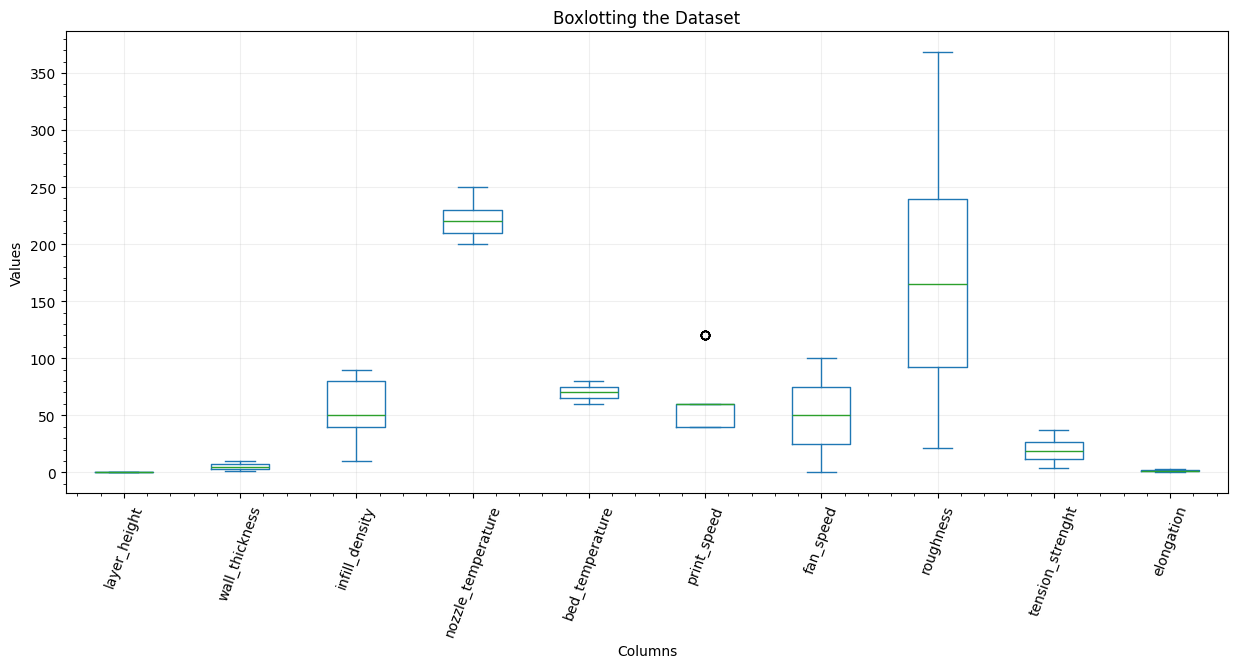

In [19]:
df.plot(kind='box',figsize=(15, 6));
plt.xlabel('Columns')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.title('Boxlotting the 3D prints Roughness Dataset')
plt.tick_params(axis='x', rotation=70) 
plt.show()

> The print_speed has an upper bound outlier.

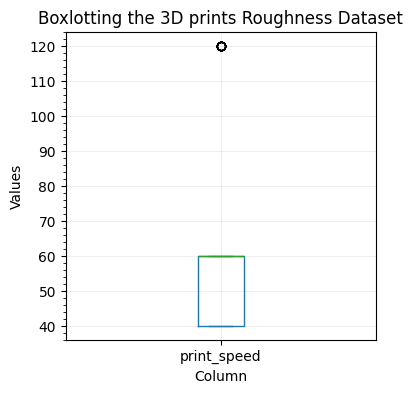

In [32]:
df['print_speed'].plot(kind='box',figsize=(4, 4));
plt.xlabel('Column')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.title('Boxlotting the 3D prints Roughness Dataset')
plt.tick_params(axis='x') 
plt.show()

> The outlier is the record that has the speed of printing as 120, let's take a further look into the records that has that speed.

In [30]:
df[df['print_speed']== 120]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
20,0.1,1,40,grid,220,60,120,abs,0,120,16,1.2
21,0.1,2,30,honeycomb,225,65,120,abs,25,144,12,1.1
22,0.1,1,50,grid,230,70,120,abs,50,265,10,0.9
23,0.1,9,80,honeycomb,240,75,120,abs,75,312,19,0.8
24,0.1,2,60,grid,250,80,120,abs,100,368,8,0.4
25,0.1,1,50,honeycomb,200,60,120,pla,0,180,11,1.6
26,0.1,4,40,grid,205,65,120,pla,25,176,12,1.2
27,0.1,3,50,honeycomb,210,70,120,pla,50,128,18,1.8
28,0.1,4,90,grid,215,75,120,pla,75,138,34,2.9
29,0.1,1,30,honeycomb,220,80,120,pla,100,121,14,1.5


> There seem to be many records that have the printing speed of 120, it is decided to keep these records as a reasonable speed of printing.

## Data preparation for modeling
In this section the following steps will be conducted:
- Feature scaling.
- Feature Selection and correlation.
- Spliting into testing and training subsets.

### Feature scaling
Since numerical outliers were detected, the feature scaling will be performed using the standard scaler. 

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,50.0,0.106,0.064397,0.02,0.06,0.10,0.150,0.2
wall_thickness,50.0,5.220,2.922747,1.00,3.00,5.00,7.000,10.0
infill_density,50.0,53.400,25.363480,10.00,40.00,50.00,80.000,90.0
nozzle_temperature,50.0,221.500,14.820353,200.00,210.00,220.00,230.000,250.0
bed_temperature,50.0,70.000,7.142857,60.00,65.00,70.00,75.000,80.0
print_speed,50.0,64.000,29.692300,40.00,40.00,60.00,60.000,120.0
fan_speed,50.0,50.000,35.714286,0.00,25.00,50.00,75.000,100.0
roughness,50.0,170.580,99.034129,21.00,92.00,165.50,239.250,368.0
tension_strenght,50.0,20.080,8.925634,4.00,12.00,19.00,27.000,37.0
elongation,50.0,1.672,0.788188,0.40,1.10,1.55,2.175,3.3


> Looking at the maximum and minimum values or the range of each of the numerical feature, the data contains diffrent scales of features so the decision is to make the step of feature scaling.

### Feature Selection and correlation
Since numerical outliers were detected, the feature scaling will be performed using the standard scaler. 

### Dataset Splitting
The splitting rule used is the 80:20 split train:test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1190652)

## Data Modeling Process

## Refrences
- [1] https://the3dbros.com/3d-print-infill-patterns-explained/